In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
import sys

In [7]:
sys.path

['/Users/kraussry/sabbatical_github/cart_pendulum/arduino_only',
 '/Users/kraussry/git/research',
 '/Users/kraussry/git/krauss_misc',
 '/Users/kraussry/git/report_generation',
 '/Users/kraussry/git/teaching',
 '/Users/kraussry/git/bad',
 '/Users/kraussry/git/py_block_diagram',
 '/Users/kraussry/git/other_peoples_repos/pyboard',
 '/Users/kraussry/git/tkinter_utils',
 '/usr/local/Cellar/python@3.9/3.9.10/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/usr/local/Cellar/python@3.9/3.9.10/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/usr/local/Cellar/python@3.9/3.9.10/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/site-packages',
 '/usr/local/lib/python3.9/site-packages/random_bode_generator-1.2.1-py3.9.egg',
 '/usr/local/opt/python-tk@3.9/libexec',
 '/usr/local/lib/python3.9/site-packages/IPython/extensions',
 '/Users/kraussry/.ipython']

In [8]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/Users/kraussry/git/py_block_diagram/py_block_diagram/__init__.py'>

In [9]:
import py_block_diagram as pybd

### Helper Function

- draw the block diagram as needed to verify things

In [10]:
def mydraw(bd,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    bd.ax = ax
    bd.draw()
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    bd.axis_off()
    #return mysys

## System Description

In [11]:
bd = pybd.block_diagram()

In [12]:
U = pybd.int_constant_block(3500,"U_cl")

in block.__init__


In [13]:
U.width = 4

In [14]:
U.place_absolute(0,0)

In [15]:
bd.append_block(U)

In [16]:
bd.block_dict

{'U_cl': <py_block_diagram.int_constant_block at 0x1260575b0>}

In [17]:
sum1 = pybd.summing_junction()

in block.__init__


In [18]:
sum1.place_relative(U,"right")

In [19]:
sum1.set_input_block1(U)

In [20]:
bd.append_block(sum1)

In [21]:
D = pybd.PD_controller(0.1,0.01)

in block.__init__


In [22]:
D.place_relative(sum1,"right")

In [23]:
D.set_input_block1(sum1)

In [24]:
D.Kd

0.01

In [25]:
D.Kp

0.1

In [26]:
bd.append_block(D)

In [27]:
diff_motors = pybd.custom_actuator("dual_motors","two_motors_dbl_actuator","&motors")

In [28]:
line_sense = pybd.custom_sensor("line_sense","qtr_line_sensor","&qtr")

In [29]:
pend_enc = pybd.custom_sensor("pend_enc","pendulum_encoder","")

In [30]:
G = pybd.plant_with_double_actuator_two_sensors(pend_enc,\
                                                line_sense,\
                                                diff_motors,"Robot")

in block.__init__


In [31]:
sat = pybd.sat2_adjustable_block(150)

in block.__init__


In [32]:
sat.set_input_block1(D)

In [33]:
bd.append_block(sat)

In [34]:
sat.place_relative(D, "right")

In [35]:
bd.ax

placed_blocks:
U_cl
sum1_block
PD_block
sat2_block
drawing: U_cl
drawing: sum1_block
drawing: PD_block
drawing: sat2_block


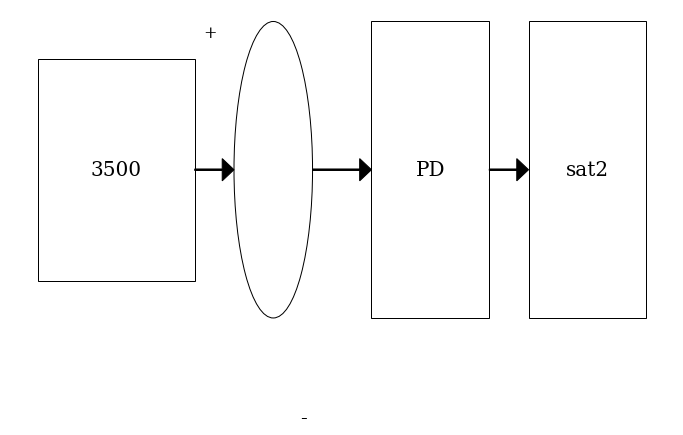

In [36]:
mydraw(bd)

In [37]:
add1 = pybd.addition_block()

in block.__init__


In [38]:
subtract1 = pybd.subtraction_block()

in block.__init__


In [39]:
v_nom = pybd.int_constant_block(200,'v_nom_block')

in block.__init__


In [40]:
v_nom.place_relative(sat, "right", yshift=6, xshift=-4)

In [41]:
bd.append_block(v_nom)

In [42]:
add1.place_relative(sat, "right", yshift=1, xshift=3)

In [43]:
subtract1.place_relative(sat, "right", yshift=-2)

In [44]:
bd.append_block(add1)

In [45]:
bd.append_block(subtract1)

placed_blocks:
U_cl
sum1_block
PD_block
sat2_block
v_nom_block
add_block1
subtract_block1
drawing: U_cl
drawing: sum1_block
drawing: PD_block
drawing: sat2_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1


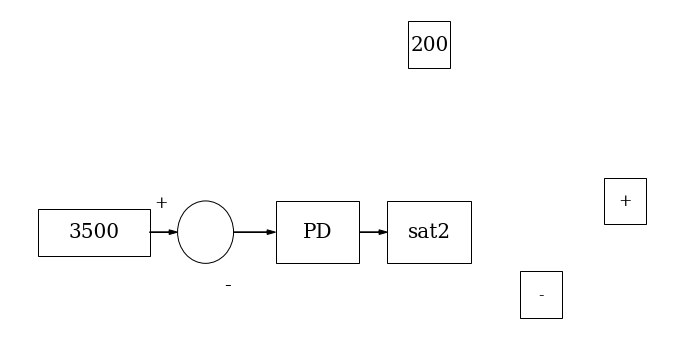

In [46]:
mydraw(bd)

In [47]:
satP = pybd.sat2_adjustable_block(400,label="satP",variable_name="satP")

in block.__init__


In [48]:
satP.place_relative(add1,"right")

In [49]:
bd.append_block(satP)

In [50]:
satP.set_input_block1(add1)

placed_blocks:
U_cl
sum1_block
PD_block
sat2_block
v_nom_block
add_block1
subtract_block1
satP
drawing: U_cl
drawing: sum1_block
drawing: PD_block
drawing: sat2_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP


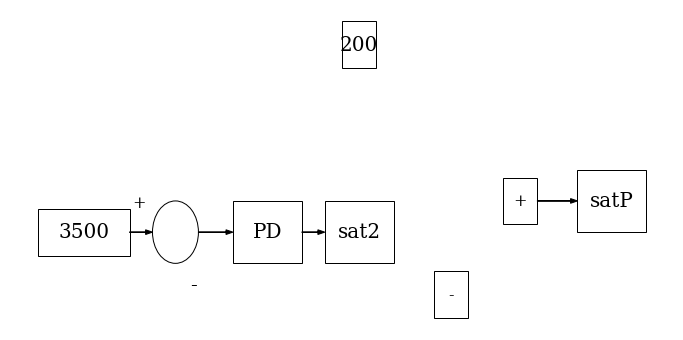

In [51]:
mydraw(bd)

In [52]:
satN = pybd.sat2_adjustable_block(400,label="satN",variable_name="satN")

in block.__init__


In [53]:
satN.place_relative(subtract1,"right")

In [54]:
bd.append_block(satN)

In [55]:
satN.set_input_block1(subtract1)

placed_blocks:
U_cl
sum1_block
PD_block
sat2_block
v_nom_block
add_block1
subtract_block1
satP
satN
drawing: U_cl
drawing: sum1_block
drawing: PD_block
drawing: sat2_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP
drawing: satN


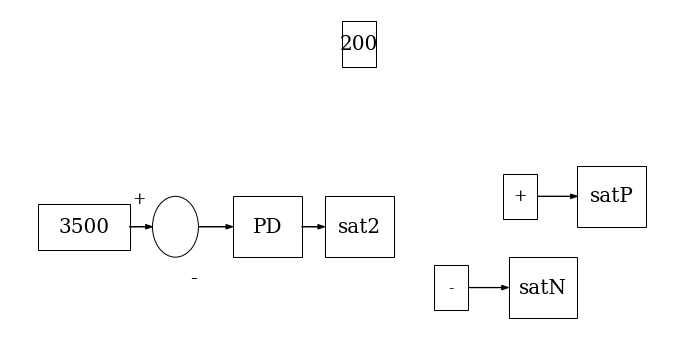

In [56]:
mydraw(bd)

In [57]:
G.set_inputs(satP,satN)

In [58]:
G.place_relative(sat,"right",16)

In [59]:
bd.append_block(G)

placed_blocks:
U_cl
sum1_block
PD_block
sat2_block
v_nom_block
add_block1
subtract_block1
satP
satN
G_block
drawing: U_cl
drawing: sum1_block
drawing: PD_block
drawing: sat2_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP
drawing: satN
drawing: G_block


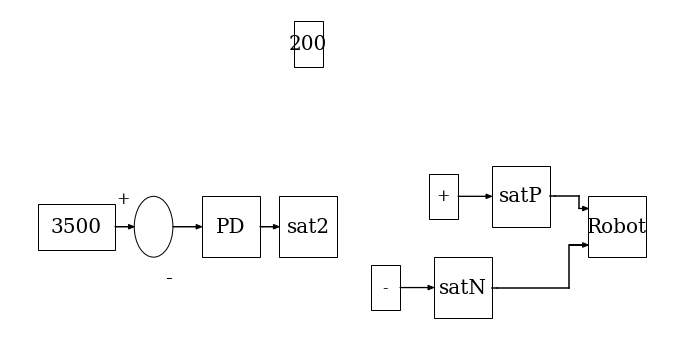

In [60]:
mydraw(bd)

In [61]:
Y = pybd.output_block("line position",G.sensor2)

in block.__init__


In [62]:
Y.place_relative(G.sensor2, "right",8)

In [63]:
Y.width = 6

In [64]:
bd.append_block(Y)

In [65]:
Y.variable_name

'Y'

In [66]:
Y2 = pybd.output_block("pend. encoder", G.sensor1)

in block.__init__


In [67]:
Y2.place_relative(G.sensor1, "right", 8)

In [68]:
bd.append_block(Y2)

In [69]:
sum1.set_input_block2(G.sensor2)

In [70]:
Y2.variable_name

'Y2'

In [71]:
sum1.fb_vertical_offset = -5

placed_blocks:
U_cl
sum1_block
PD_block
sat2_block
v_nom_block
add_block1
subtract_block1
satP
satN
G_block
unplaced_blocks:
Y
Y2
drawing: U_cl
drawing: sum1_block
calling draw_feedback_wire
drawing: PD_block
drawing: sat2_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP
drawing: satN
drawing: G_block
drawing: Y
drawing: Y2


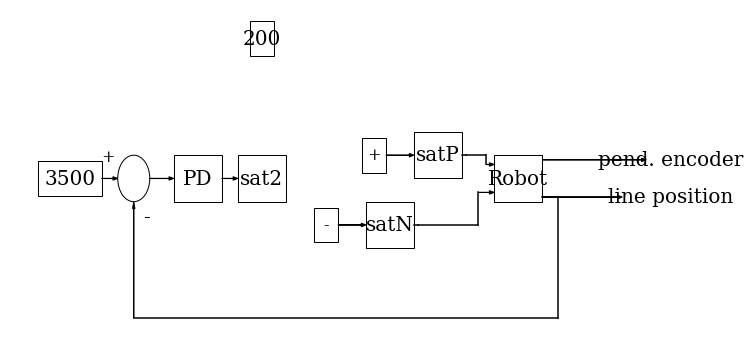

In [72]:
mysys = mydraw(bd)

In [73]:
U2 = pybd.int_constant_block(0,"U_pend")

in block.__init__


In [74]:
U2.place_relative(U,"above",15,xshift=-3)

In [75]:
bd.append_block(U2)

placed_blocks:
U_cl
sum1_block
PD_block
sat2_block
v_nom_block
add_block1
subtract_block1
satP
satN
G_block
U_pend
unplaced_blocks:
Y
Y2
drawing: U_cl
drawing: sum1_block
calling draw_feedback_wire
drawing: PD_block
drawing: sat2_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP
drawing: satN
drawing: G_block
drawing: Y
drawing: Y2
drawing: U_pend


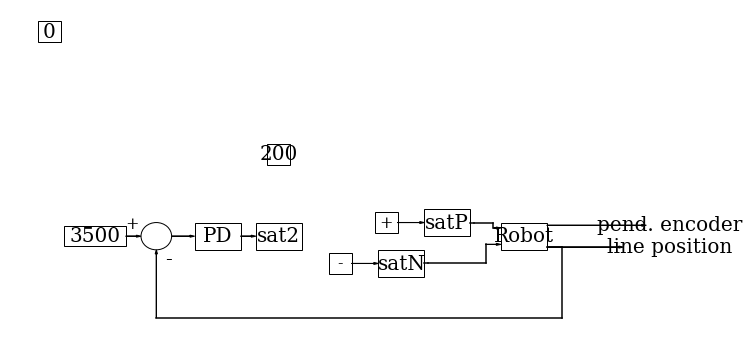

In [76]:
mysys = mydraw(bd)

In [77]:
sum2 = pybd.summing_junction(variable_name='sum2')

in block.__init__


In [78]:
sum2.place_relative(U2,"right")

In [79]:
bd.append_block(sum2)

In [80]:
sum2.set_inputs(U2,G.sensor1)

In [81]:
D2 = pybd.PD_controller(3,0.1,variable_name='D_pend')

in block.__init__


In [82]:
D2.set_input_block1(sum2)

In [83]:
D2.place_relative(sum2,"right")

In [84]:
bd.append_block(D2)

In [85]:
sat_pend = pybd.sat2_adjustable_block(200,variable_name='pend_sat')

in block.__init__


In [86]:
sat_pend.set_input_block1(D2)

In [87]:
sat_pend.place_relative(D2,"right")

In [88]:
bd.append_block(sat_pend)

In [89]:
add_pend = pybd.addition_block(variable_name="add_pend")

in block.__init__


In [90]:
add_pend.set_input_block1(sat_pend)

In [91]:
add_pend.set_input_block2(v_nom)

In [92]:
add_pend.place_relative(sat_pend,"right",yshift=-3)

In [93]:
bd.append_block(add_pend)

In [94]:
add1.set_inputs(add_pend, sat)

In [95]:
subtract1.set_inputs(add_pend, sat)

In [96]:
G.arduino_class

'plant_with_double_actuator_two_sensors'

In [97]:
type(G)

py_block_diagram.plant_with_double_actuator_two_sensors

placed_blocks:
U_cl
sum1_block
PD_block
sat2_block
v_nom_block
add_block1
subtract_block1
satP
satN
G_block
U_pend
sum2
D_pend
pend_sat
add_pend
unplaced_blocks:
Y
Y2
drawing: U_cl
drawing: sum1_block
calling draw_feedback_wire
drawing: PD_block
drawing: sat2_block
drawing: v_nom_block
drawing: add_block1
drawing: subtract_block1
drawing: satP
drawing: satN
drawing: G_block
drawing: Y
drawing: Y2
drawing: U_pend
drawing: sum2
calling draw_feedback_wire
drawing: D_pend
drawing: pend_sat
drawing: add_pend


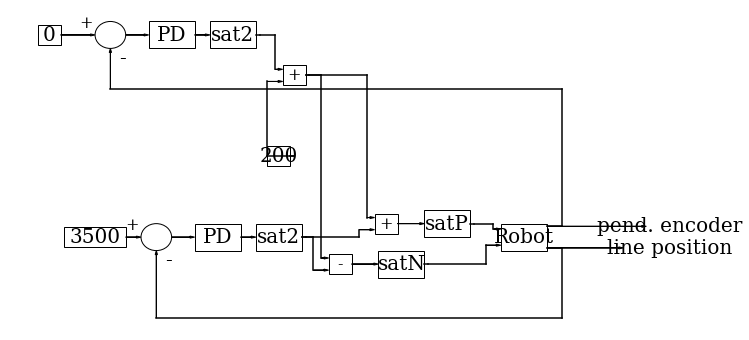

In [98]:
mydraw(bd)

In [99]:
bd.append_menu_param_from_block(D,"Kp")

In [100]:
bd.append_menu_param_from_block(D,"Kd")

In [101]:
bd.append_menu_param_from_block(v_nom,"value",1)

In [102]:
bd.append_menu_param_global_variable("t_stop")

In [103]:
bd.menu_param_list

[('PD_block.Kp', 0),
 ('PD_block.Kd', 0),
 ('v_nom_block.value', 1),
 ('t_stop', 0)]

In [117]:
bd.save_model_to_csv("cart_pend_5_mega_as_main_arduino_only.csv")

in get_csv_list_for_row: ['int_constant_block', 'U_cl', '3500', 'int_constant_block', '', '', '4', '1.5', 'absolute', '0', '0', '', '', '', '', '', 'value:3500', '', '', '', '', '', '', '', '', '']
in get_csv_list_for_row: ['summing_junction', 'sum1_block', '', 'summing_junction', 'U_cl', 'line_sense', '2', '2', 'relative', '', '', 'U_cl', 'right', '4', '0', '0', '', '', '', '', '', '', '', '', '', '']
in get_csv_list_for_row: ['PD_controller', 'PD_block', 'PD', 'PD_control_block', 'sum1_block', '', '3', '2', 'relative', '', '', 'sum1_block', 'right', '4', '0', '0', 'Kp:0.1', 'Kd:0.01', '', '', '', '', '', '', '', '']
in get_csv_list_for_row: ['sat2_adjustable_block', 'sat2_block', 'sat2', 'sat2_adjustable_block', 'PD_block', '', '3', '2', 'relative', '', '', 'PD_block', 'right', '4', '0', '0', 'mymax:150', '', '', '', '', '', '', '', '', '']
in get_csv_list_for_row: ['int_constant_block', 'v_nom_block', '200', 'int_constant_block', '', '', '1.5', '1.5', 'relative', '', '', 'sat2_block

In [118]:
pwd

'/Users/kraussry/sabbatical_github/cart_pendulum/arduino_only'

## Print Blocks

In [104]:
bd.print_blocks = [sum1,D,sat,satP,satN,pend_enc,line_sense]

## Execution Order

In [105]:
bd.find_execution_order()

i = 0, j = 0, N = 13
j = 0, N = 13, curblock = sum1_block
success
j = 0, N = 12, curblock = PD_block
success
j = 0, N = 11, curblock = sat2_block
success
j = 0, N = 10, curblock = add_block1
failure, incrementing j
j = 1, N = 10, curblock = subtract_block1
failure, incrementing j
j = 2, N = 10, curblock = satP
failure, incrementing j
j = 3, N = 10, curblock = satN
failure, incrementing j
j = 4, N = 10, curblock = Y
success
j = 4, N = 9, curblock = Y2
success
j = 4, N = 8, curblock = sum2
success
j = 4, N = 7, curblock = D_pend
success
j = 4, N = 6, curblock = pend_sat
success
j = 4, N = 5, curblock = add_pend
success
i = 1, j = 0, N = 4
j = 0, N = 4, curblock = add_block1
success
j = 0, N = 3, curblock = subtract_block1
success
j = 0, N = 2, curblock = satP
success
j = 0, N = 1, curblock = satN
success
successful sorting of exec_order:
U_cl
v_nom_block
U_pend
G_block
sum1_block
PD_block
sat2_block
Y
Y2
sum2
D_pend
pend_sat
add_pend
add_block1
subtract_block1
satP
satN


In [106]:
bd.execution_order

## Codegen Test

In [107]:
msg = "Cart Pendulum Line Follow 4"

In [108]:
bd.welcome_msg = msg

In [109]:
ls *.ino

cart_pendulum_template1_vib_only.ino  cart_pendulum_template2.ino


In [110]:
template_fn = "cart_pendulum_template2.ino"

In [111]:
bd.generate_arduino_code("cart_pendulum_autogen_5_line_follow_with_vib_suppress_05_03_22", template_fn,\
                           verbosity=1)

block: <py_block_diagram.int_constant_block object at 0x1260575b0>
block: <py_block_diagram.summing_junction object at 0x1260bd550>
block: <py_block_diagram.PD_controller object at 0x1260c04c0>
block: <py_block_diagram.sat2_adjustable_block object at 0x1260c05b0>
block: <py_block_diagram.int_constant_block object at 0x1260a3580>
block: <py_block_diagram.addition_block object at 0x1260cf670>
block: <py_block_diagram.subtraction_block object at 0x1260cf610>
block: <py_block_diagram.sat2_adjustable_block object at 0x1261e9400>
block: <py_block_diagram.sat2_adjustable_block object at 0x12626f820>
block: <py_block_diagram.plant_with_double_actuator_two_sensors object at 0x1260c07c0>
block: <py_block_diagram.output_block object at 0x12639c4f0>
block: <py_block_diagram.output_block object at 0x1263a9760>
block: <py_block_diagram.int_constant_block object at 0x126436130>
block: <py_block_diagram.summing_junction object at 0x1264f7e50>
block: <py_block_diagram.PD_controller object at 0x126502a0

In [112]:
add1._get_arduino_param_str()

''

In [113]:
16/400000*1000*2

0.08

In [114]:
5/8*28

17.5

In [115]:
bytearray(8)

bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00')